# Logistic Regression_Spotify Song Attributes

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pt
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
%matplotlib inline
df=pd.read_csv("C:\\Users\\29265\\Downloads\\data.csv")

In [21]:
df.head(3)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.165,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.137,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.159,-7.148,1,0.2890,75.044,4,0.173,1,Xanny Family,Future


In [5]:
def filterVariables(df):
    data = []
    for col in df.columns:
        if df[col].nunique()>3: #dtype == 'float64':
            level = 'continuous'
        elif df[col].nunique()<3: #dtype == 'int64':
            level = 'class'
       

        col_dict = {
            'varname': col,
            'datatype': df[col].dtype,
            'continuous_class': level
           
        }
        data.append(col_dict)
        

    meta = pd.DataFrame(data, columns=['varname', 'datatype','continuous_class'])
    meta.set_index('varname', inplace=True)
    return meta

In [6]:

def FillNullValue(dfnull):
    df_new=filterVariables(dfnull)
    df_new=df_new.T
    df_new
    for i in df_new.columns:
        for j in dfnull.columns:
            if i==j:
                if list(df_new[i])[1]=='continuous':
                    if dfnull[i].dtypes=='int64':

                        a=dfnull[i].median()
                        dfnull[i].fillna(a,inplace=True)
                    if dfnull[i].dtypes=='float64':
                        a=dfnull[i].median()
                        dfnull[i].fillna(a,inplace=True)
                    if dfnull[i].dtypes=='object':
                        a=dfnull[i].mode()
                        dfnull[i].fillna(a[0],inplace=True)
                else:
                    a=dfnull[i].mode()
                    dfnull[i].fillna(a[0],inplace=True)
    return dfnull

In [10]:
def remove_outlier(df_in):
    for i in df.columns:
        
        q1 = df_in[i].quantile(0.25)
        q3 = df_in[i].quantile(0.75)
        iqr = q3-q1 #Interquartile range
        fence_low  = q1-1.5*iqr
        fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in[i] > fence_low) & (df_in[i] < fence_high)]
    return df_out

In [ ]:
def countNullValue_RemoveColHAve30Percent(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
  
    missing_application_train_data=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
 
    missing_application_train_data=missing_application_train_data.T
    for i in missing_application_train_data.columns:
        a=missing_application_train_data[i]
        if a[1]>30:
            df.drop(i,axis=1,inplace=True)
    return df

In [ ]:
#remove special charecter where d is dataframe, i is that value which needs to be place with j
def removeSpecialChar(d,i,j):
    #dictionary = {'í':'i', 'á':'a','#':'','_':''}
    dictionary = {i:j}
    d.replace(dictionary, regex=True, inplace=True)
    return d

In [7]:
dfnull=FillNullValue(df)
dfnull.head(2)


,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino


In [8]:
df=dfnull
df.head(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino


In [9]:
df.isnull().sum()

Unnamed: 0          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
target              0
song_title          0
artist              0
dtype: int64

In [43]:
y=df['target']
x=df.drop(['target','song_title','artist'],axis=1)

In [44]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
y_pred_class = logreg.predict(X_test)

In [47]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.964356435644


In [48]:
print(metrics.confusion_matrix(y_test, y_pred_class))

[[245   7]
 [ 11 242]]


In [49]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

In [50]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.964356435644
0.964356435644


# below To find probablity for each ¶

In [51]:
y_pred_prob = logreg.predict_proba(X_test)

In [52]:
y_pred_prob

array([[  7.99005449e-06,   9.99992010e-01],
       [  1.56991781e-03,   9.98430082e-01],
       [  2.82209236e-04,   9.99717791e-01],
       ..., 
       [  9.26002575e-01,   7.39974253e-02],
       [  9.99607776e-01,   3.92223511e-04],
       [  9.97612818e-01,   2.38718233e-03]])

In [54]:
Like_dislikeed=pd.DataFrame(y_pred_prob)

In [55]:
Like_dislikeed.rename(columns={0:'disliked',1:'liked'},inplace=True)

In [58]:
df=pd.concat([df,Like_dislikeed,],axis=1)

In [59]:
df.head(2)

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist,disliked,liked
0,0,0.0102,0.833,204600,0.434,0.02190,2,0.165,-8.795,1,0.4310,150.062,4,0.286,1,Mask Off,Future,0.000008,0.999992
1,1,0.1990,0.743,326933,0.359,0.00611,1,0.137,-10.401,1,0.0794,160.083,4,0.588,1,Redbone,Childish Gambino,0.001570,0.998430


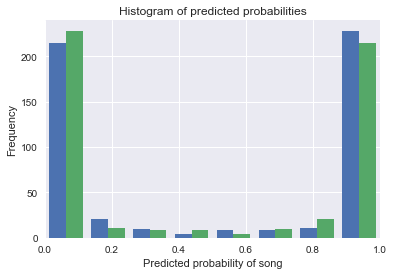

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.hist(y_pred_prob, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of song')
plt.ylabel('Frequency')